# Data Cleaning And Visualization

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('application_record.csv')

In [19]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


# Let's Check for some Null values in our data

In [20]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [23]:
#we can see our data has NaN values 
df['OCCUPATION_TYPE'].isna()

0          True
1          True
2         False
3         False
4         False
          ...  
438552     True
438553    False
438554    False
438555     True
438556    False
Name: OCCUPATION_TYPE, Length: 438557, dtype: bool

In [8]:
#as we have null values in our data we will first drop them before moving ahead
df=df.dropna(subset='OCCUPATION_TYPE')

In [13]:
#check again for null values
df.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

Our data is cleaned now 

# let's visualize our data

# Scatter plot

In [27]:
employed=df[df['DAYS_EMPLOYED']<0]

In [43]:
employed['DAYS_EMPLOYED']=employed['DAYS_EMPLOYED']*-1

C:\Users\Sam\AppData\Local\Temp\ipykernel_2000\656580554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_EMPLOYED']=employed['DAYS_EMPLOYED']*-1


In [44]:
employed['DAYS_BIRTH']=employed['DAYS_BIRTH']*-1

C:\Users\Sam\AppData\Local\Temp\ipykernel_2000\4195717620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employed['DAYS_BIRTH']=employed['DAYS_BIRTH']*-1


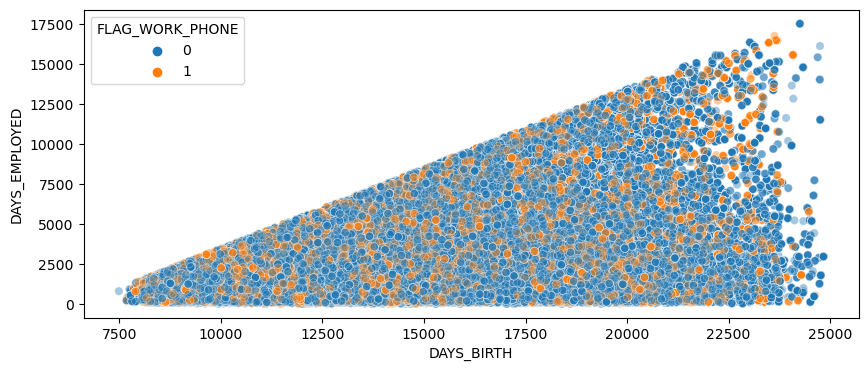

In [50]:
#lets plot the values
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data=employed,x='DAYS_BIRTH',y='DAYS_EMPLOYED',alpha=0.4,hue='FLAG_WORK_PHONE');

# Histogram

# plotting Age in years and count

In [63]:
df['Age in years']=-1*df['DAYS_BIRTH']/365

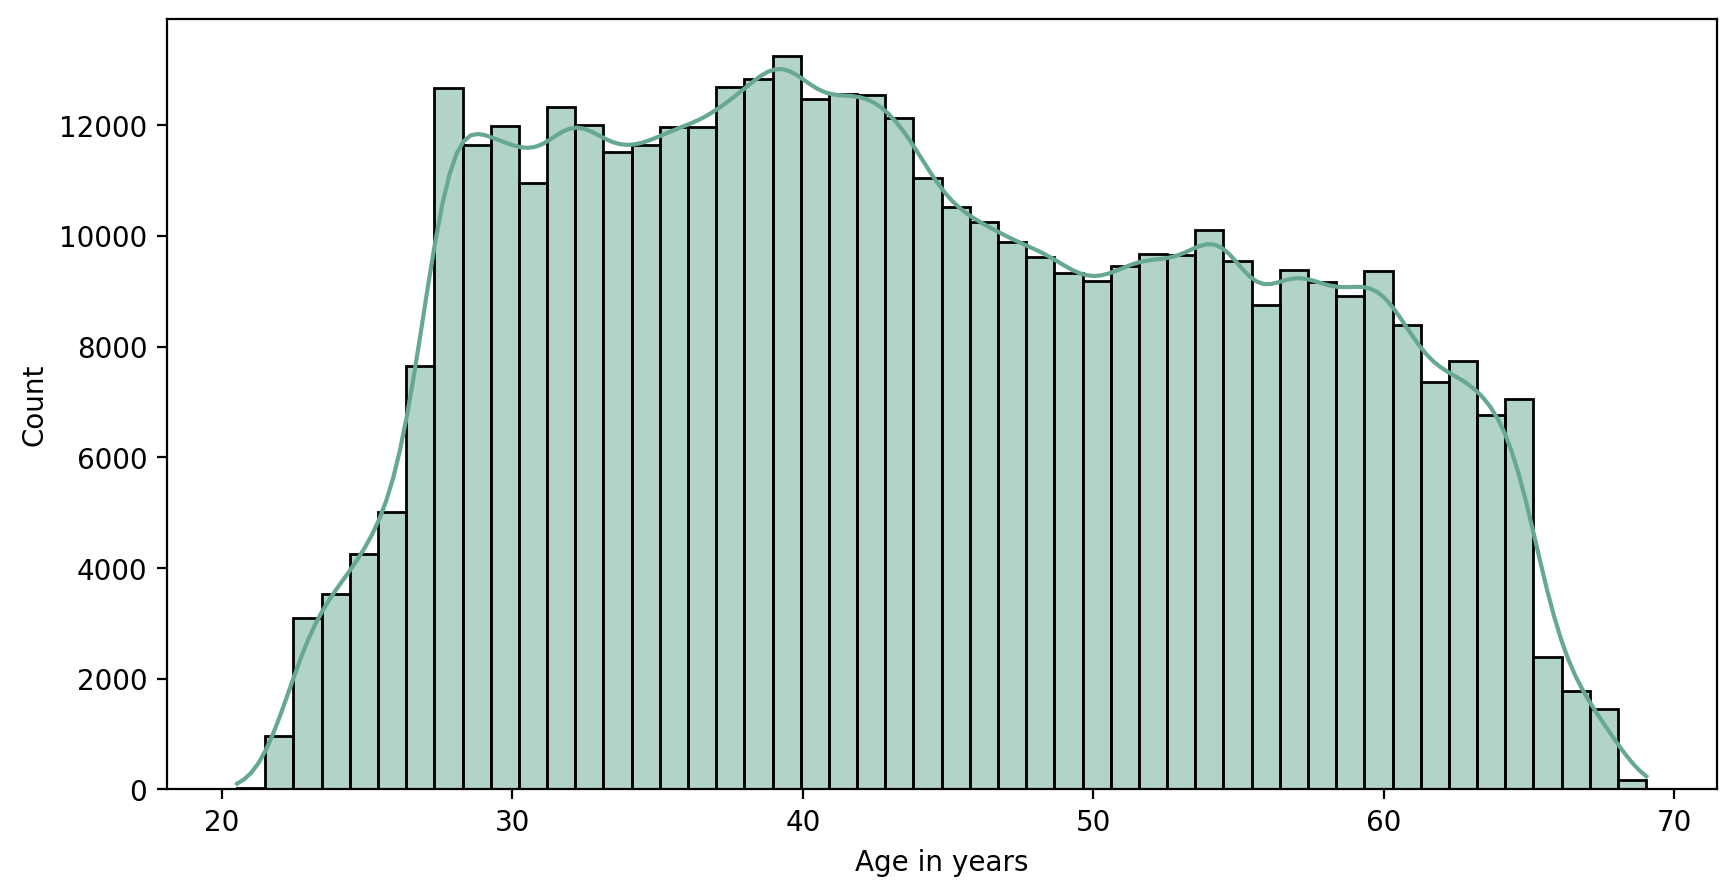

In [69]:
#now let's plott it using histogram
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=df,x='Age in years',bins=50,color='#67A895',kde=True);

# Box plott
plotting bottom half income

In [83]:
n=int(len(df['AMT_INCOME_TOTAL'])/2)

In [91]:
df['bottom half income']=df['AMT_INCOME_TOTAL'].nsmallest(n)

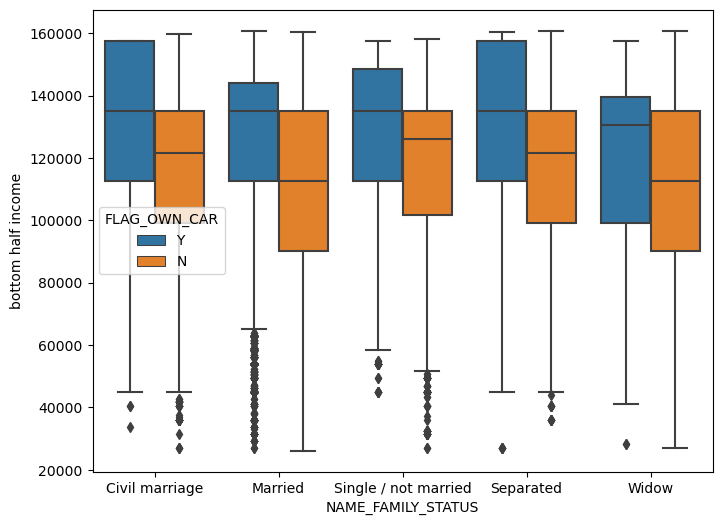

In [116]:
plt.figure(figsize=(8,6),dpi=100)
sns.boxplot(data=df,x='NAME_FAMILY_STATUS',y='bottom half income',hue='FLAG_OWN_CAR');

# HeatMap of correlation Values

In [126]:
corr=df.drop('FLAG_MOBIL',axis=1).corr()

C:\Users\Sam\AppData\Local\Temp\ipykernel_2000\676719666.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.drop('FLAG_MOBIL',axis=1).corr()


<Axes: >

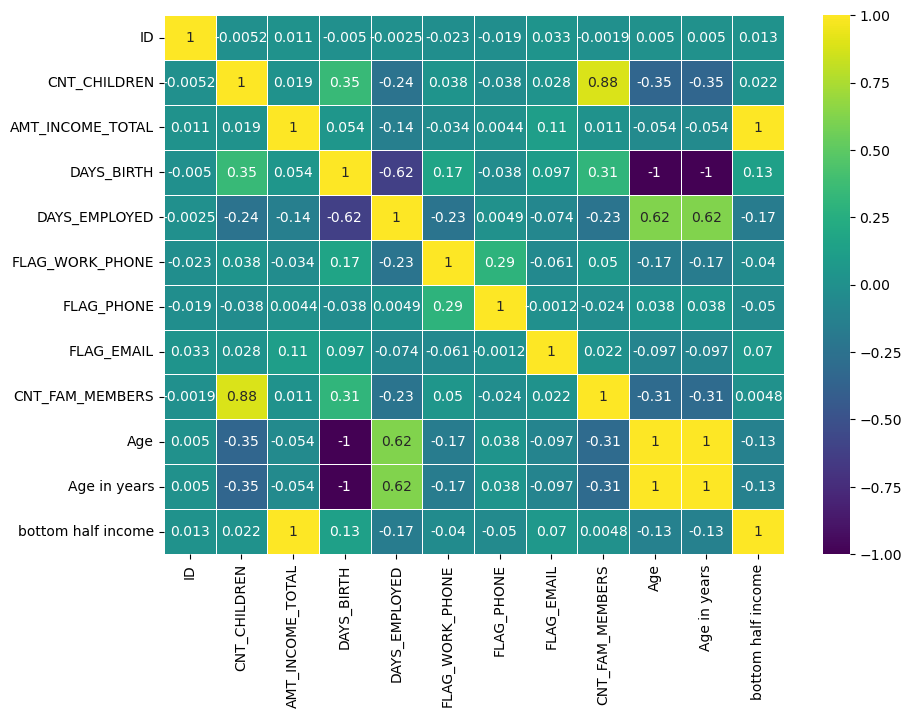

In [133]:
plt.figure(figsize=(10,7))
sns.heatmap(data=corr,annot=True,cmap='viridis',linewidths=0.5)